In [40]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [41]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    result = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1.
    return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train.shape

(25000, 10000)

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [19]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 160us/step - loss: 0.5358 - accuracy: 0.7819 - val_loss: 0.4037 - val_accuracy: 0.8677
Epoch 2/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.3254 - accuracy: 0.8993 - val_loss: 0.3159 - val_accuracy: 0.8855
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.2379 - accuracy: 0.9259 - val_loss: 0.2941 - val_accuracy: 0.8854
Epoch 4/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1906 - accuracy: 0.9395 - val_loss: 0.2855 - val_accuracy: 0.8856
Epoch 5/20
15000/15000 [==============================] - 2s 135us/step - loss: 0.1516 - accuracy: 0.9542 - val_loss: 0.2775 - val_accuracy: 0.8884
Epoch 6/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1250 - accuracy: 0.9613 - val_loss: 0.2860 - val_accuracy: 0.8859
Epoch 7/20
15000/15000 [==============================] - 2s 1

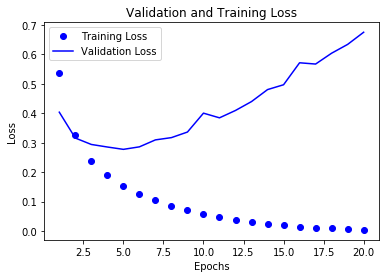

In [27]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

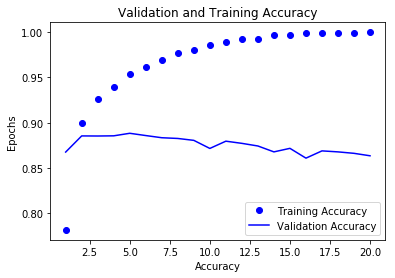

In [30]:
plt.clf()

accuracy_values = history_dict['accuracy']
val_accuracy_values = history_dict['val_accuracy']

plt.plot(epochs, accuracy_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation Accuracy')
plt.title('Validation and Training Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs')
plt.legend()

plt.show()

In [42]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

results

Epoch 1/4
25000/25000 [==============================] - 3s 101us/step - loss: 0.5107 - accuracy: 0.7962
Epoch 2/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.3060 - accuracy: 0.9041
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2221 - accuracy: 0.9253
Epoch 4/4
25000/25000 [==============================] - 2s 86us/step


[0.31911646956443784, 0.8721200227737427]

In [33]:
model.predict(x_test)

array([[0.13506734],
       [0.9993849 ],
       [0.5292819 ],
       ...,
       [0.06810403],
       [0.04378724],
       [0.43267658]], dtype=float32)